<a href="https://colab.research.google.com/github/positivejmk/2021-2-practice/blob/master/week4_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
%matplotlib inline

import numpy as np
import warnings
warnings. filterwarnings("ignore", category = np.VisibleDeprecationWarning)

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigMining/bank-additional/bank-additional-full.csv', sep = ';')

In [67]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Conversion Rate

##은행 텔레 마케팅의 효과 측정

In [68]:
df.shape

(41188, 21)

In [69]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [70]:
# conversion 변수 생성
# 1 : 정기예금 가입(y 변수값 'yes'), 0 : 가입하지 않은 경우(y 변수값 'no')
df['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [71]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


# 1. Aggregate Conversion Rate

In [72]:
print('total conversions : %i out of %i' % (df.conversion.sum(), df.shape[0]))

total conversions : 4640 out of 41188


In [73]:
print('conversion rate: %0.2f%%' % (df.conversion.sum() / df.shape[0] * 100.0))

conversion rate: 11.27%


#2. Conversion Rates by Number of Contacts

In [74]:
# 고객 컨택 횟수별 전환 고객 수
pd.DataFrame(df.groupby(
    by = 'campaign'
  )['conversion'].sum()
)

,conversion
campaign,
1,2300
2,1211
3,574
4,249
5,120
6,75
7,38
8,17
9,17


In [75]:
df.groupby(
    by = 'campaign'
  )['conversion'].sum()

campaign
1     2300
2     1211
3      574
4      249
5      120
6       75
7       38
8       17
9       17
10      12
11      12
12       3
13       4
14       1
15       2
16       0
17       4
18       0
19       0
20       0
21       0
22       0
23       1
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
37       0
39       0
40       0
41       0
42       0
43       0
56       0
Name: conversion, dtype: int64

In [76]:
df.groupby(
    'campaign'
)['conversion'].sum()

campaign
1     2300
2     1211
3      574
4      249
5      120
6       75
7       38
8       17
9       17
10      12
11      12
12       3
13       4
14       1
15       2
16       0
17       4
18       0
19       0
20       0
21       0
22       0
23       1
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
37       0
39       0
40       0
41       0
42       0
43       0
56       0
Name: conversion, dtype: int64

In [77]:
#고객 컨택 횟수별 고객 수
pd.DataFrame(
    df.groupby(
        by = 'campaign'
    )['conversion'].count()
)

,conversion
campaign,
1,17642
2,10570
3,5341
4,2651
5,1599
6,979
7,629
8,400
9,283


In [78]:
conversions_by_contacts = df.groupby('campaign')['conversion'].sum()/ \
df.groupby('campaign')['conversion'].count() * 100.0

In [79]:
conversions_by_contacts

campaign
1     13.037071
2     11.456954
3     10.747051
4      9.392682
5      7.504690
6      7.660878
7      6.041335
8      4.250000
9      6.007067
10     5.333333
11     6.779661
12     2.400000
13     4.347826
14     1.449275
15     3.921569
16     0.000000
17     6.896552
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     6.250000
24     0.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     0.000000
30     0.000000
31     0.000000
32     0.000000
33     0.000000
34     0.000000
35     0.000000
37     0.000000
39     0.000000
40     0.000000
41     0.000000
42     0.000000
43     0.000000
56     0.000000
Name: conversion, dtype: float64

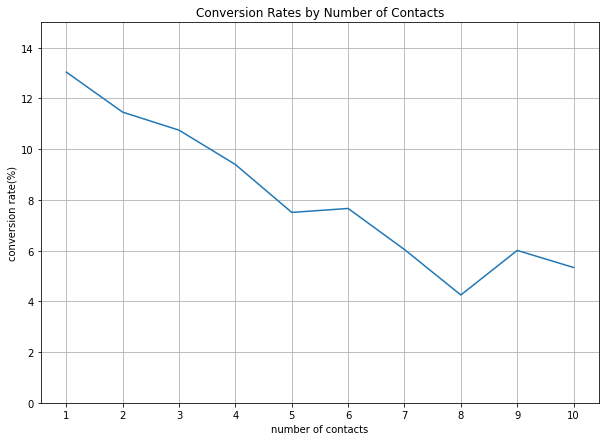

In [80]:
# 10개 포인트를 시각화
ax = conversions_by_contacts[:10].plot(
    grid = True,
    figsize = (10,7),
    xticks = conversions_by_contacts.index[:10],
    title = 'Conversion Rates by Number of Contacts'
)

ax.set_ylim([0,15])
ax.set_xlabel('number of contacts')
ax.set_ylabel('conversion rate(%)')

plt.show()

# 3. Conversion Rates by Age

###1) Line Chart

In [81]:
pd.DataFrame(
    df.groupby(
        by = 'age'
    )['conversion'].sum()
)

,conversion
age,
17,2
18,12
19,20
20,23
21,29
...,...
91,0
92,3
94,0


In [82]:
pd.DataFrame(
    df.groupby(
        by = 'age'
    )['conversion'].count()
)

,conversion
age,
17,5
18,28
19,42
20,65
21,102
...,...
91,2
92,4
94,1


In [83]:
conversions_by_age = df.groupby(
    by = 'age'
)['conversion'].sum() / df.groupby(
    by = 'age'
)['conversion'].count() * 100.0

In [84]:
pd.DataFrame(conversions_by_age)

,conversion
age,
17,40.000000
18,42.857143
19,47.619048
20,35.384615
21,28.431373
...,...
91,0.000000
92,75.000000
94,0.000000


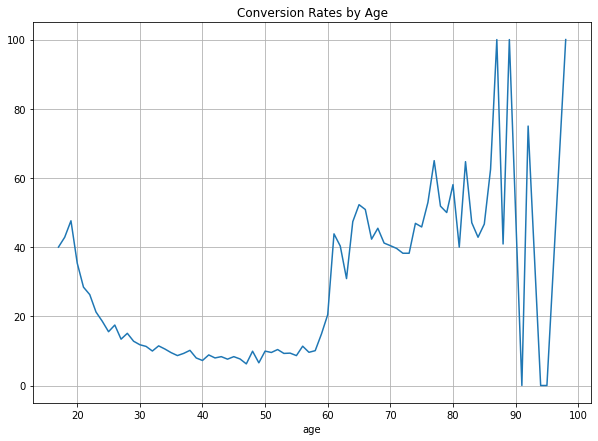

In [85]:
#17-89세 사이의 모든 포인트를 시각화
x = conversions_by_age.plot(
    grid = True,
    figsize = (10,7),
    title = 'Conversion Rates by Age'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

###2)Age Groups

In [86]:
df['age_group'] = df['age'].apply(
    lambda x: '[18, 30)' if x < 30 else '[30, 40)' if x < 40 \
        else '[40,50)' if x < 50 else '[50,60)' if x < 60 \
        else '[60,70)' if x < 70 else '70+'
)

In [87]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50,60)"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50,60)"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[30, 40)"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[40,50)"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50,60)"


In [88]:
pd.DataFrame(
    df.groupby(
        by = 'age_group'
    )['conversion'].sum()
)

,conversion
age_group,
70+,221
"[18, 30)",922
"[30, 40)",1715
"[40,50)",834
"[50,60)",697
"[60,70)",251


In [89]:
pd.DataFrame(
    df.groupby(
        by = 'age_group'
    )['conversion'].count()
)

,conversion
age_group,
70+,469
"[18, 30)",5669
"[30, 40)",16938
"[40,50)",10526
"[50,60)",6862
"[60,70)",724


In [90]:
conversions_by_age_group = df.groupby(
    by = 'age_group'
)['conversion'].sum() / df.groupby(
    by = 'age_group'
)['conversion'].count() *100.0

In [91]:
pd.DataFrame(conversions_by_age_group)

,conversion
age_group,
70+,47.121535
"[18, 30)",16.263891
"[30, 40)",10.125162
"[40,50)",7.923238
"[50,60)",10.157389
"[60,70)",34.668508


In [92]:
conversions_by_age_group = conversions_by_age_group.reindex(index = ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+'])

In [93]:
pd.DataFrame(conversions_by_age_group)

,conversion
age_group,
"[18, 30)",16.263891
"[30, 40)",10.125162
"[40, 50)",NaN
"[50, 60)",NaN
"[60, 70)",NaN
70+,47.121535


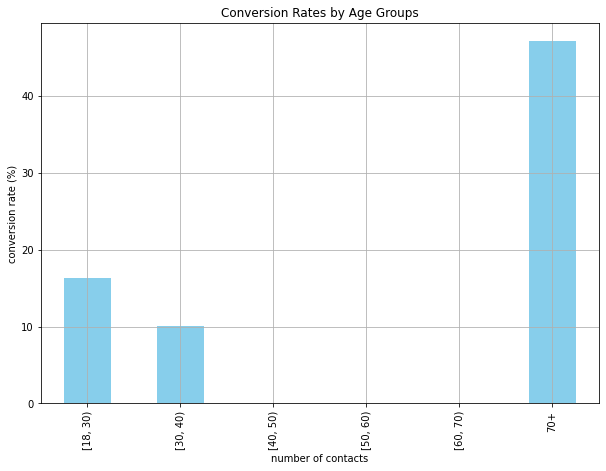

In [94]:
ax = conversions_by_age_group.plot(
    kind = 'bar',
    color = 'skyblue',
    grid = True,
    figsize = (10,7),
    title = 'Conversion Rates by Age Groups'
)

ax.set_xlabel('number of contacts')
ax.set_ylabel('conversion rate (%)')

plt.show()

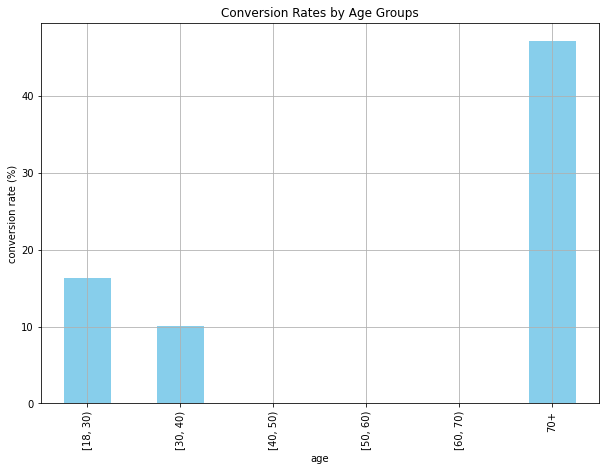

In [95]:
ax = conversions_by_age_group.reindex(
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
).plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age Groups'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

## 4. Conversions vs Non-Conversions

### 1) Martial Status

In [96]:
#pivot_table (pivot 할 데이터 프레임, values = 데이터로 사용할 열, index = 행 위치에 들어갈 열,
#             columns = 열 위치에 들어갈 열, aggfunc = 데이터 집계함수 ['mean', 'sum'])

conversion_by_marital_status_df = pd.pivot_table(df, values = 'y', index = 'marital', columns = 'conversion', aggfunc = len)
conversion_by_marital_status_df

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [97]:
#데이터 프레임의 컬럼 이름 바꾸기
conversion_by_marital_status_df.columns = ['non_converisons', 'conversions']

In [98]:
conversion_by_marital_status_df

,non_converisons,conversions
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


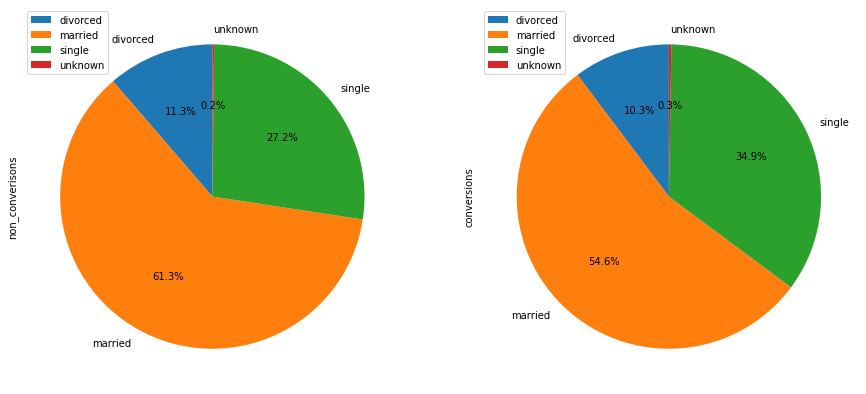

In [99]:
conversion_by_marital_status_df.plot(
    kind = 'pie',
    figsize = (15,7),
    startangle = 90,
    subplots = True,  #컬럼별로 다른 차트 생성
    autopct = '%.1f%%'  #부채꼴 안에 표시될 숫자의 형식 지정: 소수점 한자리까지 표시하여 % 출력(%%사용)
)
plt.show()

###2) Education

In [100]:
conversions_by_education_df = pd.pivot_table(df, values = 'y', index = 'education', columns = 'conversion', aggfunc = len)
conversions_by_education_df

conversion,0,1
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [101]:
conversions_by_education_df.columns = ['non_conversions', 'conversions']

In [102]:
conversions_by_education_df

,non_conversions,conversions
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


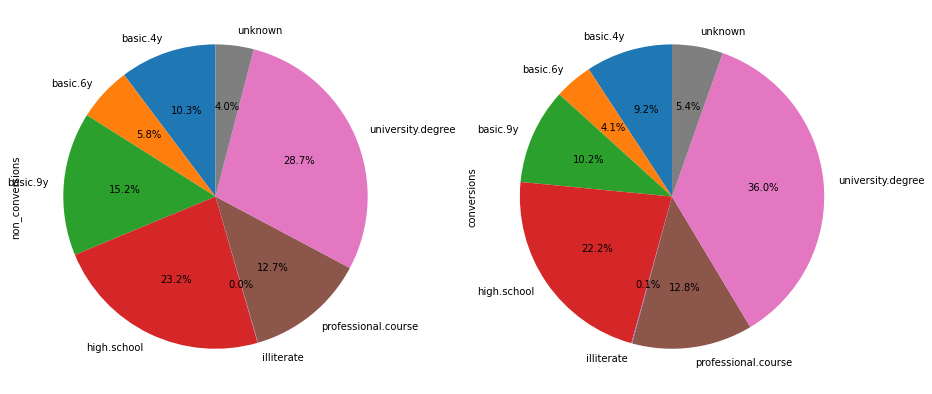

In [103]:
conversions_by_education_df.plot(
    kind = 'pie',
    figsize = (15,7),
    startangle = 90,
    subplots = True,
    autopct = '%.1f%%',
    legend = False
)

plt.show()

###3) Last Contact Duration

In [104]:
df.groupby('conversion')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
conversion,,,,,,,,
0,36548.0,220.844807,207.096293,0.0,95.0,163.5,279.00,4918.0
1,4640.0,553.191164,401.171871,37.0,253.0,449.0,741.25,4199.0


In [105]:
#pd.concat() : 여러개의 동일한 형태의 DataFrame 합치기
#loc는 변수명을 기준으로 데이터 프레임을 분리하고, iloc는 인덱스 번호로 분류
#reset_index() : 기존의 행 인덱스 제거 (drop = True인 경우 데이터 열로 올리지 않음)
#axis = 1 : 열로 합치기

duration_df = pd.concat([
                         df.loc[df['conversion'] == 1, 'duration'].reset_index(drop = True),
                         df.loc[df['conversion'] == 0, 'duration'].reset_index(drop = True)
], axis = 1)

In [106]:
duration_df

,duration,duration
0,1575.0,261
1,1042.0,149
2,1467.0,226
3,579.0,151
4,461.0,307
...,...,...
36543,NaN,254
36544,NaN,112
36545,NaN,383
36546,NaN,189


In [107]:
duration_df.columns = ['converisons', 'non_conversions']

In [108]:
duration_df = duration_df / (60*60)

In [109]:
duration_df

,converisons,non_conversions
0,0.437500,0.072500
1,0.289444,0.041389
2,0.407500,0.062778
3,0.160833,0.041944
4,0.128056,0.085278
...,...,...
36543,NaN,0.070556
36544,NaN,0.031111
36545,NaN,0.106389
36546,NaN,0.052500


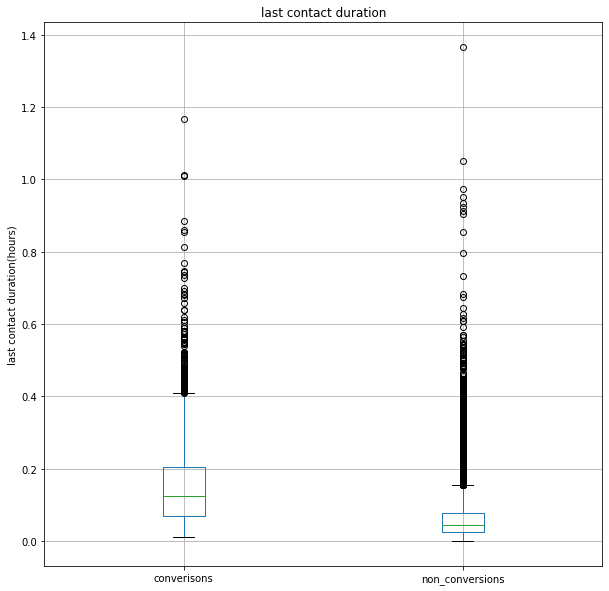

In [110]:
ax = duration_df.plot(
    kind = 'box',
    grid = True,
    figsize = (10,10)
)

ax.set_ylabel('last contact duration(hours)')
ax.set_title('last contact duration')

plt.show()

###5. Conversions by Age Groups & Marital Status

In [111]:
# unstack : 행을 열로 변환 (옆으로 늘어 놓음)
# fillna(0) : 결측값을 0으로 대체

age_marital_df = df.groupby(['age_group', 'marital'])['conversion'].sum().unstack('marital').fillna(0)
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
70+,64.0,151.0,6.0,0.0
"[18, 30)",12.0,158.0,751.0,1.0
"[30, 40)",128.0,897.0,684.0,6.0
"[40,50)",126.0,575.0,130.0,3.0
"[50,60)",119.0,533.0,44.0,1.0
"[60,70)",27.0,218.0,5.0,1.0


In [112]:
df.groupby(
    by = 'age_group'
)['conversion'].count()

age_group
70+           469
[18, 30)     5669
[30, 40)    16938
[40,50)     10526
[50,60)      6862
[60,70)       724
Name: conversion, dtype: int64

In [113]:
#conversion rate = sum(conversion)/total count of each age_group

age_marital_df = age_marital_df.divide(
    df.groupby(
        by = 'age_group'
    )['conversion'].count(),
    axis = 0
)

In [114]:
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
70+,0.136461,0.321962,0.012793,0.000000
"[18, 30)",0.002117,0.027871,0.132475,0.000176
"[30, 40)",0.007557,0.052958,0.040383,0.000354
"[40,50)",0.011970,0.054627,0.012350,0.000285
"[50,60)",0.017342,0.077674,0.006412,0.000146
"[60,70)",0.037293,0.301105,0.006906,0.001381


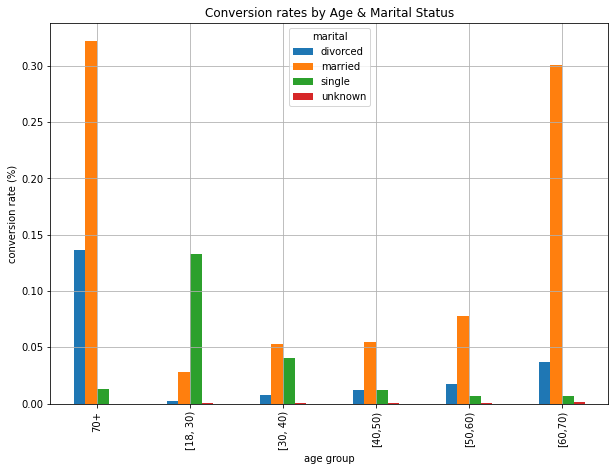

In [115]:
ax = age_marital_df.plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

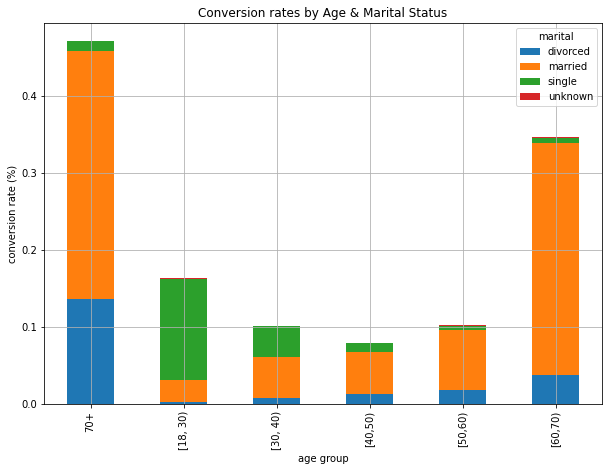

In [116]:
ax = age_marital_df.plot(
    kind='bar', 
    stacked=True, # 누적 막대 그래프 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()